In [1]:
#import Libraries 
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
chd_data=pd.read_csv('/content/CHDdata diagnosis.csv')
chd_data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [3]:
#check for null value 
chd_data.isnull().sum()


sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [4]:
#check for duplicated
chd_data.duplicated().sum()

0

In [5]:
#check data types
chd_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(chd_data.iloc[:,4])
chd_data.iloc[:,4]=le.transform(chd_data.iloc[:,4])

chd_data


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


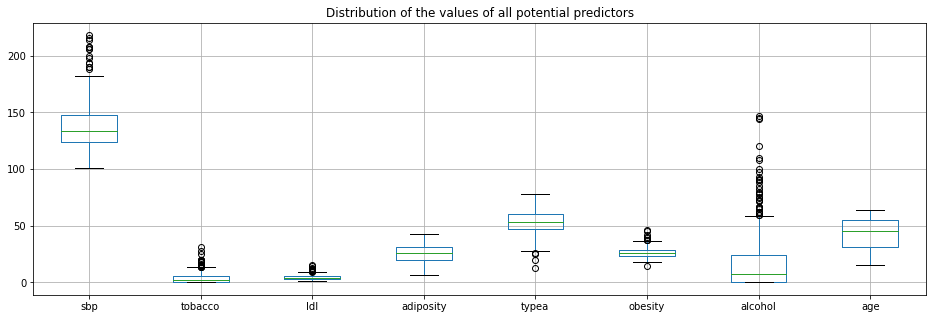

In [7]:
Index = np.r_[0:4,5:9]
plt.figure(figsize=(16,5))
chd_data.iloc[:,Index].boxplot()
plt.title("Distribution of the values ​​of all potential predictors")
plt.show()


In [8]:
outliers = ['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol']
for column in outliers:
  Q1,Q3 = np.percentile(chd_data[column],[25,75])
  IQR = Q3 - Q1
  lower_fence = Q1 - (1.5*IQR)
  upper_fence = Q3 + (1.5*IQR)  
  chd_data[column] = chd_data[column].apply(lambda x: upper_fence if x>upper_fence
                                              else lower_fence if x<lower_fence else x)      

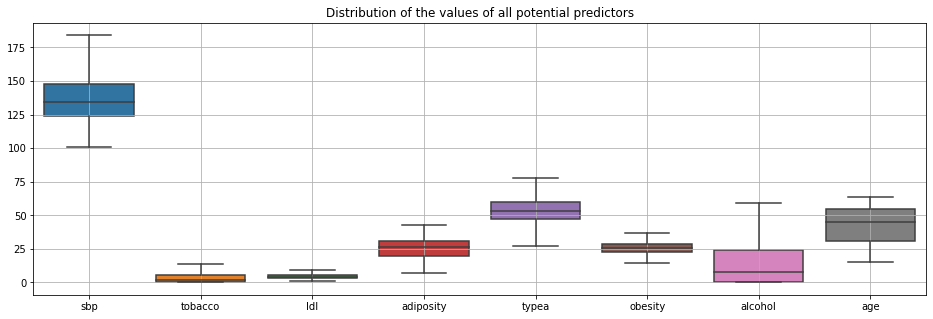

In [9]:
plt.figure(figsize=(16,5))
sns.boxplot(data=chd_data.iloc[:,Index])
plt.title("Distribution of the values ​​of all potential predictors")
plt.grid()
plt.show()

In [10]:
chd_data.to_csv('diagnosis_clean.csv', index=False)

In [11]:
df_clean = pd.read_csv('diagnosis_clean.csv')
df_clean.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160.0,12.00,5.73,23.11,1,49.0,25.30,58.96625,52,1
1,144.0,0.01,4.41,28.61,0,55.0,28.87,2.06000,63,1
2,118.0,0.08,3.48,32.28,1,52.0,29.14,3.81000,46,0
3,170.0,7.50,6.41,38.03,1,51.0,31.99,24.26000,58,1
4,134.0,13.60,3.50,27.78,1,60.0,25.99,57.34000,49,1


In [12]:
#rescaling
scaler = StandardScaler()
chd_data.iloc[:,Index] = scaler.fit_transform(chd_data.iloc[:,Index])
chd_data.iloc[0:5,:]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1.191055,2.192213,0.557379,-0.295503,1,-0.432099,-0.170222,2.376877,0.629336,1
1,0.335523,-0.878642,-0.144857,0.412140,0,0.191095,0.728577,-0.708434,1.383115,1
2,-1.054716,-0.860714,-0.639614,0.884332,1,-0.120502,0.796553,-0.613553,0.218184,0
3,1.725763,1.039682,0.919137,1.624141,1,-0.224368,1.514082,0.495193,1.040488,1
4,-0.199184,2.602001,-0.628974,0.305351,1,0.710422,0.003495,2.288706,0.423760,1


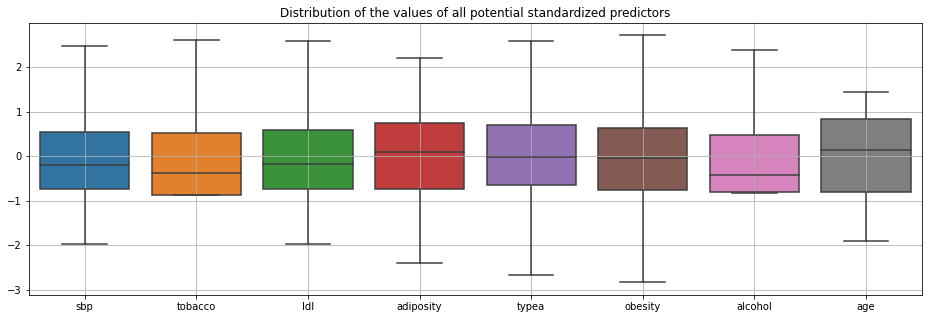

In [13]:
plt.figure(figsize=(16,5))
sns.boxplot(data=chd_data.iloc[:,Index])
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

In [14]:
#spliting data
x=chd_data.iloc[:,:-1]
y=chd_data.iloc[:,-1]
x

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.191055,2.192213,0.557379,-0.295503,1,-0.432099,-0.170222,2.376877,0.629336
1,0.335523,-0.878642,-0.144857,0.412140,0,0.191095,0.728577,-0.708434,1.383115
2,-1.054716,-0.860714,-0.639614,0.884332,1,-0.120502,0.796553,-0.613553,0.218184
3,1.725763,1.039682,0.919137,1.624141,1,-0.224368,1.514082,0.495193,1.040488
4,-0.199184,2.602001,-0.628974,0.305351,1,0.710422,0.003495,2.288706,0.423760
...,...,...,...,...,...,...,...,...,...
457,2.474353,-0.778756,0.690378,0.812281,0,1.125885,0.622836,-0.820122,1.040488
458,2.367412,0.194492,-0.144857,0.861173,0,-0.120502,0.663118,0.194829,0.629336
459,-1.589424,-0.112849,-1.645089,-1.309364,0,-1.366889,-1.481915,0.624231,0.834912
460,-1.054716,0.501834,2.590273,0.692625,0,1.125885,0.345895,0.479470,-0.192969


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.iloc[0,:]

sbp          1.511880
tobacco     -0.676309
ldl          0.504179
adiposity    1.389975
famhist      0.000000
typea       -0.328233
obesity      2.201399
alcohol      0.741341
age          1.177539
Name: 411, dtype: float64

In [17]:
model = keras.Sequential()

model.add(keras.layers.Dense(2, input_shape= (9,), activation = 'softmax'))

In [18]:
from tensorflow.keras import optimizers

RMS = optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
    )

adam = optimizers.Adam(
    learning_rate=0.002, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-07, 
    decay=0.0,
    name="adam"
    )

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
sgd = optimizers.SGD(learning_rate=lr_schedule, name ='sgd')

In [19]:
# model.compile(optimizer= 'adagrad', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.compile(optimizer= 'sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights= True)
callback2 = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights= True)
results = model.fit(
    x = x_train,
    y = y_train,
    shuffle=True,
    epochs = 100,
    batch_size = 32,
    # callbacks=[callback1, callback1],
    validation_data = (x_test, y_test)
)


Epoch 1/100
12/12 [==============================] - 1s 38ms/step - loss: 1.1157 - accuracy: 0.4715 - val_loss: 1.1897 - val_accuracy: 0.4839
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0731 - accuracy: 0.4797 - val_loss: 1.1442 - val_accuracy: 0.4946
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0334 - accuracy: 0.4851 - val_loss: 1.1023 - val_accuracy: 0.4946
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9972 - accuracy: 0.4905 - val_loss: 1.0625 - val_accuracy: 0.5161
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9627 - accuracy: 0.5176 - val_loss: 1.0253 - val_accuracy: 0.5269
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9305 - accuracy: 0.5285 - val_loss: 0.9899 - val_accuracy: 0.5376
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9002 - accuracy: 0.5339 - val_loss: 0.9575 - val_accuracy: 0.5484
Epoch 8/100


In [21]:
eval = model.evaluate(x = x_test, y = y_test)


3/3 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.7419


Text(0, 0.5, 'Losses')

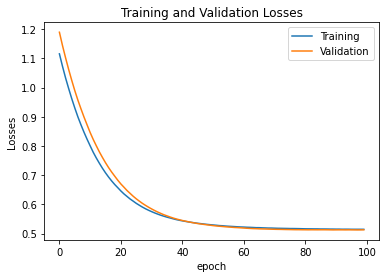

In [22]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

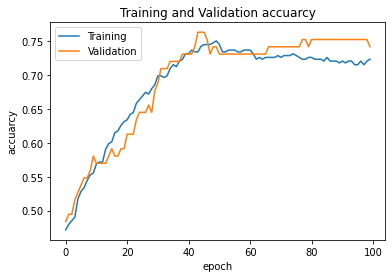

In [23]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.save('final_project_chd_diagnostic_NN.h5')

In [26]:
((model.predict(x_train.iloc[0:25,:]) >= 0.5).astype(int)).reshape(1,-1)

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0]])

In [27]:
model.predict(x_train.iloc[0:1,:])

array([[0.70064384, 0.29935625]], dtype=float32)